In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
import graphviz
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from math import sqrt
import joblib

import warnings
warnings.filterwarnings('ignore')

## CS610 AI Tools and Paradigms: Final Project
### By: Jessie Bernitt, Kirat Mokha & Tyler Graham

### Baseline Model
#### Part 1: Clean the Data!

In [4]:
df = pd.read_csv('dataset.csv')
df.head(100)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Bronchial Asthma,fatigue,cough,high_fever,breathlessness,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Bronchial Asthma,fatigue,cough,high_fever,breathlessness,family_history,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Bronchial Asthma,fatigue,cough,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Bronchial Asthma,cough,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


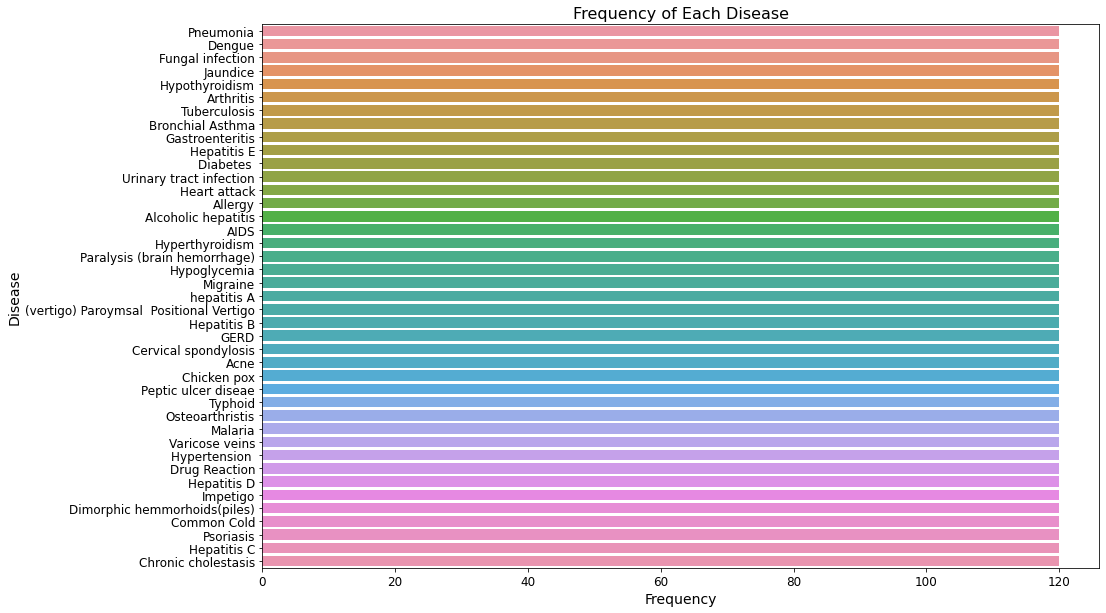

In [5]:
sns.set_palette("deep")

# Count the frequency of each disease
disease_counts = df['Disease'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Frequency']

# Increase the figure size for better spacing and readability
plt.figure(figsize=(15, 10))  # Adjusting the size here; you can modify these values as needed

# Recreate the bar plot with the adjusted figure size
sns.barplot(x='Frequency', y='Disease', data=disease_counts)

# Adding plot title and labels with increased font size
plt.title('Frequency of Each Disease', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Disease', fontsize=14)

# Optionally, increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the updated plot
plt.show()

### Step 2: Create inverted dataframe

In [6]:
symptoms = []

for cols in df.columns[1:]:
    symptoms.append(df[cols].unique().tolist())
    
symptom_list = sum(symptoms, [])
unique_symptoms = set(symptom_list)
unique_symptoms = [x for x in unique_symptoms if str(x) != 'nan']
# unique_symptoms = [x.lstrip() for x in unique_symptoms]
    
print(unique_symptoms)

[' anxiety', ' cold_hands_and_feets', ' acute_liver_failure', ' chest_pain', ' irregular_sugar_level', ' slurred_speech', ' lethargy', ' watering_from_eyes', ' palpitations', ' indigestion', ' malaise', ' stomach_pain', ' abnormal_menstruation', ' painful_walking', ' prominent_veins_on_calf', ' blood_in_sputum', ' yellowish_skin', ' pain_in_anal_region', ' back_pain', ' constipation', ' swelling_of_stomach', ' excessive_hunger', ' increased_appetite', ' toxic_look_(typhos)', ' congestion', ' weakness_of_one_body_side', ' scurring', ' yellow_urine', ' irritability', ' sunken_eyes', ' mood_swings', ' irritation_in_anus', ' diarrhoea', ' continuous_feel_of_urine', ' bruising', ' runny_nose', ' dizziness', ' dischromic _patches', ' rusty_sputum', ' fatigue', ' movement_stiffness', ' stiff_neck', ' swollen_legs', ' internal_itching', ' throat_irritation', ' receiving_unsterile_injections', ' muscle_pain', ' yellowing_of_eyes', ' abdominal_pain', ' skin_rash', ' weight_gain', ' loss_of_balan

In [7]:
cleaned_df = pd.DataFrame(columns=unique_symptoms)
cleaned_df['Disease'] = df['Disease']
cleaned_df.head()

,anxiety,cold_hands_and_feets,acute_liver_failure,chest_pain,irregular_sugar_level,slurred_speech,lethargy,watering_from_eyes,palpitations,indigestion,...,shivering,foul_smell_of urine,sinus_pressure,extra_marital_contacts,swelled_lymph_nodes,itching,continuous_sneezing,fast_heart_rate,vomiting,Disease
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fungal infection
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fungal infection
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fungal infection
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fungal infection
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fungal infection


In [8]:
# iterator = df.iterrows

for index,row in df.iterrows():
#     print(row)
    for col in df.columns[1:]:
        value = row[col]
        if(str(value) != 'nan'):
            cleaned_df[value][index] = 1
            
cleaned_df.head(100)

,anxiety,cold_hands_and_feets,acute_liver_failure,chest_pain,irregular_sugar_level,slurred_speech,lethargy,watering_from_eyes,palpitations,indigestion,...,shivering,foul_smell_of urine,sinus_pressure,extra_marital_contacts,swelled_lymph_nodes,itching,continuous_sneezing,fast_heart_rate,vomiting,Disease
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Fungal infection
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fungal infection
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Fungal infection
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Fungal infection
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronchial Asthma
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronchial Asthma
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronchial Asthma
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronchial Asthma


In [9]:
cleaned_df = cleaned_df.fillna(0)
pd.set_option('display.max_columns', None)
cleaned_df.head()

,anxiety,cold_hands_and_feets,acute_liver_failure,chest_pain,irregular_sugar_level,slurred_speech,lethargy,watering_from_eyes,palpitations,indigestion,malaise,stomach_pain,abnormal_menstruation,painful_walking,prominent_veins_on_calf,blood_in_sputum,yellowish_skin,pain_in_anal_region,back_pain,constipation,swelling_of_stomach,excessive_hunger,increased_appetite,toxic_look_(typhos),congestion,weakness_of_one_body_side,scurring,yellow_urine,irritability,sunken_eyes,mood_swings,irritation_in_anus,diarrhoea,continuous_feel_of_urine,bruising,runny_nose,dizziness,dischromic _patches,rusty_sputum,fatigue,movement_stiffness,stiff_neck,swollen_legs,internal_itching,throat_irritation,receiving_unsterile_injections,muscle_pain,yellowing_of_eyes,abdominal_pain,skin_rash,weight_gain,loss_of_balance,hip_joint_pain,redness_of_eyes,weight_loss,small_dents_in_nails,swelling_joints,pain_behind_the_eyes,coma,loss_of_smell,lack_of_concentration,inflammatory_nails,visual_disturbances,acidity,spinning_movements,unsteadiness,cramps,joint_pain,red_spots_over_body,bloody_stool,depression,knee_pain,altered_sensorium,blister,chills,nodal_skin_eruptions,loss_of_appetite,enlarged_thyroid,ulcers_on_tongue,mucoid_sputum,burning_micturition,bladder_discomfort,puffy_face_and_eyes,passage_of_gases,nausea,blackheads,breathlessness,receiving_blood_transfusion,muscle_weakness,high_fever,dehydration,mild_fever,spotting_ urination,silver_like_dusting,belly_pain,phlegm,headache,pain_during_bowel_movements,skin_peeling,pus_filled_pimples,swollen_extremeties,obesity,swollen_blood_vessels,red_sore_around_nose,distention_of_abdomen,dark_urine,neck_pain,stomach_bleeding,blurred_and_distorted_vision,cough,family_history,patches_in_throat,fluid_overload,brittle_nails,history_of_alcohol_consumption,weakness_in_limbs,sweating,polyuria,yellow_crust_ooze,restlessness,drying_and_tingling_lips,muscle_wasting,shivering,foul_smell_of urine,sinus_pressure,extra_marital_contacts,swelled_lymph_nodes,itching,continuous_sneezing,fast_heart_rate,vomiting,Disease
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection


### Step 3: Baseline Model

In [10]:
unique_values = cleaned_df['Disease'].unique()
le = LabelEncoder()
le.fit(unique_values)
cleaned_df['encoded_disease'] = le.transform(cleaned_df['Disease'])
    
cleaned_df.head()

,anxiety,cold_hands_and_feets,acute_liver_failure,chest_pain,irregular_sugar_level,slurred_speech,lethargy,watering_from_eyes,palpitations,indigestion,malaise,stomach_pain,abnormal_menstruation,painful_walking,prominent_veins_on_calf,blood_in_sputum,yellowish_skin,pain_in_anal_region,back_pain,constipation,swelling_of_stomach,excessive_hunger,increased_appetite,toxic_look_(typhos),congestion,weakness_of_one_body_side,scurring,yellow_urine,irritability,sunken_eyes,mood_swings,irritation_in_anus,diarrhoea,continuous_feel_of_urine,bruising,runny_nose,dizziness,dischromic _patches,rusty_sputum,fatigue,movement_stiffness,stiff_neck,swollen_legs,internal_itching,throat_irritation,receiving_unsterile_injections,muscle_pain,yellowing_of_eyes,abdominal_pain,skin_rash,weight_gain,loss_of_balance,hip_joint_pain,redness_of_eyes,weight_loss,small_dents_in_nails,swelling_joints,pain_behind_the_eyes,coma,loss_of_smell,lack_of_concentration,inflammatory_nails,visual_disturbances,acidity,spinning_movements,unsteadiness,cramps,joint_pain,red_spots_over_body,bloody_stool,depression,knee_pain,altered_sensorium,blister,chills,nodal_skin_eruptions,loss_of_appetite,enlarged_thyroid,ulcers_on_tongue,mucoid_sputum,burning_micturition,bladder_discomfort,puffy_face_and_eyes,passage_of_gases,nausea,blackheads,breathlessness,receiving_blood_transfusion,muscle_weakness,high_fever,dehydration,mild_fever,spotting_ urination,silver_like_dusting,belly_pain,phlegm,headache,pain_during_bowel_movements,skin_peeling,pus_filled_pimples,swollen_extremeties,obesity,swollen_blood_vessels,red_sore_around_nose,distention_of_abdomen,dark_urine,neck_pain,stomach_bleeding,blurred_and_distorted_vision,cough,family_history,patches_in_throat,fluid_overload,brittle_nails,history_of_alcohol_consumption,weakness_in_limbs,sweating,polyuria,yellow_crust_ooze,restlessness,drying_and_tingling_lips,muscle_wasting,shivering,foul_smell_of urine,sinus_pressure,extra_marital_contacts,swelled_lymph_nodes,itching,continuous_sneezing,fast_heart_rate,vomiting,Disease,encoded_disease
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,15
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15


In [11]:
print(cleaned_df['Disease'].unique())
print(cleaned_df['encoded_disease'].unique())

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27]


In [12]:
X = cleaned_df.drop('Disease',axis=1)
X = X.drop('encoded_disease',axis=1)
y = cleaned_df['encoded_disease']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [13]:
decision_tree_model = DecisionTreeClassifier(random_state=10,ccp_alpha=0.01)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy of the Decision Tree Classifier: {accuracy*100}%')

Accuracy of the Decision Tree Classifier: 93.73983739837398%


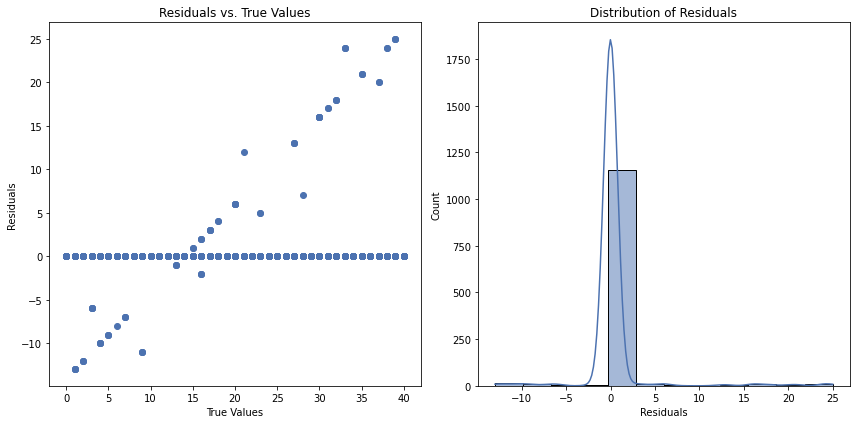

Mean Absolute Percentage Error (MAPE): 0.10%
Root Mean Squared Error (RMSE): 3.28


In [14]:
sns.set_palette("deep")
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Calculating MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

In [15]:
feature_names = X.columns.tolist()
target_names = cleaned_df['Disease'].unique().tolist()
export_graphviz(decision_tree_model, out_file='decision_tree_classifier.dot', 
                feature_names=feature_names, class_names=target_names, filled=True)

In [16]:
with open('decision_tree_classifier.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.format = 'png'
graph.render('decision_tree',view=False)

Image(filename='decision_tree.png')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Score for Logistic Regression:  100.0%
Confusion Matrix:
 [[28  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  0 30  0]
 [ 0  0  0 ...  0  0 34]]


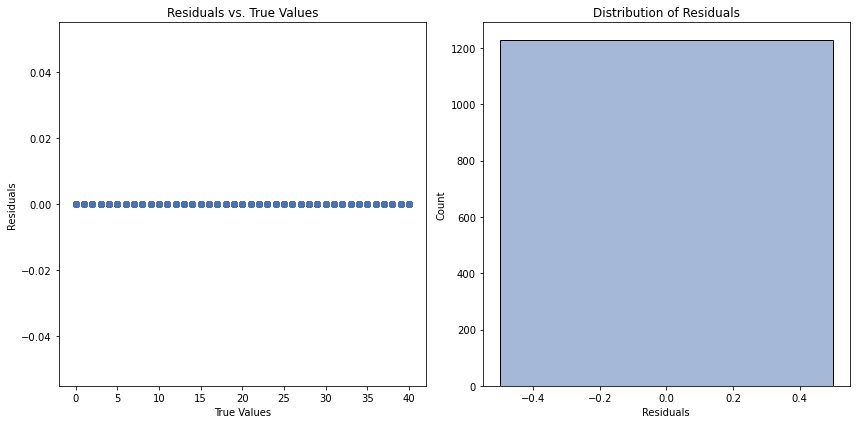

Mean Absolute Percentage Error (MAPE): 0.10%
Root Mean Squared Error (RMSE): 3.28


In [17]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_clf_pred = clf.predict(X_test)

print(f"Score for Logistic Regression:  {clf.score(X_test, y_test)*100}%")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_clf_pred)}")

sns.set_palette("deep")
# Calculating residuals
residuals = y_test - y_clf_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Calculating MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

In [18]:
cleaned_df.to_csv('cleaned_dataset.csv',index=False)

#### Part 4: Simplifying the Dataset!

In [19]:
# Load the disease classes dataset
disease_classes_path = 'diseaseclasses.csv'
disease_classes_df = pd.read_csv(disease_classes_path)

In [20]:
# Merge your dataset with the disease classes dataset
# It uses 'left' join to keep all records from your dataset and add matching records from the disease classes dataset
merged_dataset = pd.merge(cleaned_df, disease_classes_df, left_on='Disease', right_on='Disease Name', how='left')

# Drop the extra columns if needed (like 'Disease ID' and 'Disease Name' from the disease classes dataset)
merged_dataset.drop(columns=['Disease ID', 'Disease Name'], inplace=True)



In [21]:
merged_dataset.head(20)

,anxiety,cold_hands_and_feets,acute_liver_failure,chest_pain,irregular_sugar_level,slurred_speech,lethargy,watering_from_eyes,palpitations,indigestion,malaise,stomach_pain,abnormal_menstruation,painful_walking,prominent_veins_on_calf,blood_in_sputum,yellowish_skin,pain_in_anal_region,back_pain,constipation,swelling_of_stomach,excessive_hunger,increased_appetite,toxic_look_(typhos),congestion,weakness_of_one_body_side,scurring,yellow_urine,irritability,sunken_eyes,mood_swings,irritation_in_anus,diarrhoea,continuous_feel_of_urine,bruising,runny_nose,dizziness,dischromic _patches,rusty_sputum,fatigue,movement_stiffness,stiff_neck,swollen_legs,internal_itching,throat_irritation,receiving_unsterile_injections,muscle_pain,yellowing_of_eyes,abdominal_pain,skin_rash,weight_gain,loss_of_balance,hip_joint_pain,redness_of_eyes,weight_loss,small_dents_in_nails,swelling_joints,pain_behind_the_eyes,coma,loss_of_smell,lack_of_concentration,inflammatory_nails,visual_disturbances,acidity,spinning_movements,unsteadiness,cramps,joint_pain,red_spots_over_body,bloody_stool,depression,knee_pain,altered_sensorium,blister,chills,nodal_skin_eruptions,loss_of_appetite,enlarged_thyroid,ulcers_on_tongue,mucoid_sputum,burning_micturition,bladder_discomfort,puffy_face_and_eyes,passage_of_gases,nausea,blackheads,breathlessness,receiving_blood_transfusion,muscle_weakness,high_fever,dehydration,mild_fever,spotting_ urination,silver_like_dusting,belly_pain,phlegm,headache,pain_during_bowel_movements,skin_peeling,pus_filled_pimples,swollen_extremeties,obesity,swollen_blood_vessels,red_sore_around_nose,distention_of_abdomen,dark_urine,neck_pain,stomach_bleeding,blurred_and_distorted_vision,cough,family_history,patches_in_throat,fluid_overload,brittle_nails,history_of_alcohol_consumption,weakness_in_limbs,sweating,polyuria,yellow_crust_ooze,restlessness,drying_and_tingling_lips,muscle_wasting,shivering,foul_smell_of urine,sinus_pressure,extra_marital_contacts,swelled_lymph_nodes,itching,continuous_sneezing,fast_heart_rate,vomiting,Disease,encoded_disease,Disease Class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15,NaN
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,15,NaN
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15,NaN
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15,NaN
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15,NaN
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,15,NaN
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [22]:
merged_dataset.describe()

,anxiety,cold_hands_and_feets,acute_liver_failure,chest_pain,irregular_sugar_level,slurred_speech,lethargy,watering_from_eyes,palpitations,indigestion,malaise,stomach_pain,abnormal_menstruation,painful_walking,prominent_veins_on_calf,blood_in_sputum,yellowish_skin,pain_in_anal_region,back_pain,constipation,swelling_of_stomach,excessive_hunger,increased_appetite,toxic_look_(typhos),congestion,weakness_of_one_body_side,scurring,yellow_urine,irritability,sunken_eyes,mood_swings,irritation_in_anus,diarrhoea,continuous_feel_of_urine,bruising,runny_nose,dizziness,dischromic _patches,rusty_sputum,fatigue,movement_stiffness,stiff_neck,swollen_legs,internal_itching,throat_irritation,receiving_unsterile_injections,muscle_pain,yellowing_of_eyes,abdominal_pain,skin_rash,weight_gain,loss_of_balance,hip_joint_pain,redness_of_eyes,weight_loss,small_dents_in_nails,swelling_joints,pain_behind_the_eyes,coma,loss_of_smell,lack_of_concentration,inflammatory_nails,visual_disturbances,acidity,spinning_movements,unsteadiness,cramps,joint_pain,red_spots_over_body,bloody_stool,depression,knee_pain,altered_sensorium,blister,chills,nodal_skin_eruptions,loss_of_appetite,enlarged_thyroid,ulcers_on_tongue,mucoid_sputum,burning_micturition,bladder_discomfort,puffy_face_and_eyes,passage_of_gases,nausea,blackheads,breathlessness,receiving_blood_transfusion,muscle_weakness,high_fever,dehydration,mild_fever,spotting_ urination,silver_like_dusting,belly_pain,phlegm,headache,pain_during_bowel_movements,skin_peeling,pus_filled_pimples,swollen_extremeties,obesity,swollen_blood_vessels,red_sore_around_nose,distention_of_abdomen,dark_urine,neck_pain,stomach_bleeding,blurred_and_distorted_vision,cough,family_history,patches_in_throat,fluid_overload,brittle_nails,history_of_alcohol_consumption,weakness_in_limbs,sweating,polyuria,yellow_crust_ooze,restlessness,drying_and_tingling_lips,muscle_wasting,shivering,foul_smell_of urine,sinus_pressure,extra_marital_contacts,swelled_lymph_nodes,itching,continuous_sneezing,fast_heart_rate,vomiting,encoded_disease
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.023171,0.023171,0.023171,0.141463,0.023171,0.024390,0.092683,0.021951,0.024390,0.045122,0.142683,0.045122,0.048780,0.046341,0.023171,0.024390,0.185366,0.023171,0.046341,0.046341,0.023171,0.093902,0.024390,0.023171,0.024390,0.021951,0.021951,0.023171,0.096341,0.021951,0.046341,0.023171,0.114634,0.023171,0.023171,0.024390,0.068293,0.021951,0.024390,0.392683

In [23]:
merged_dataset.loc[merged_dataset['Disease'] == 'Allergy', 'Disease Class'] = 'allergy'
merged_dataset.loc[merged_dataset['Disease'] == 'Fungal infection', 'Disease Class'] = 'skin disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Acne', 'Disease Class'] = 'skin disease'
merged_dataset.loc[merged_dataset['Disease'] == 'GERD', 'Disease Class'] = 'gastrointestinal system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Chronic cholestasis', 'Disease Class'] = 'gastrointestinal system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Drug Reaction', 'Disease Class'] = 'allergy'
merged_dataset.loc[merged_dataset['Disease'] == 'AIDS', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Diabetes ', 'Disease Class'] = 'acquired metabolic disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Gastroenteritis', 'Disease Class'] = 'gastrointestinal system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Bronchial Asthma', 'Disease Class'] = 'respiratory system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hypertension', 'Disease Class'] = 'cardiovascular system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Migraine', 'Disease Class'] = 'nervous system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Cervical spondylosis', 'Disease Class'] = 'degenerative disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Paralysis (brain hemorrhage)', 'Disease Class'] = 'nervous system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Jaundice', 'Disease Class'] = 'gastrointestinal system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Malaria', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Chicken pox', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Dengue', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'hepatitis A', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hepatitis B', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hepatitis C', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hepatitis D', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hepatitis E', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Alcoholic hepatitis', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Tuberculosis', 'Disease Class'] = 'respiratory system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Common Cold', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Pneumonia', 'Disease Class'] = 'viral infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Dimorphic hemmorhoids(piles)', 'Disease Class'] = 'gastrointestinal system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Heart attack', 'Disease Class'] = 'cardiovascular system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Varicose veins', 'Disease Class'] = 'vascular system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hypothyroidism', 'Disease Class'] = 'endocrine system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hyperthyroidism', 'Disease Class'] = 'endocrine system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hypoglycemia', 'Disease Class'] = 'endocrine system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Osteoarthristis', 'Disease Class'] = 'skeletal system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Arthritis', 'Disease Class'] = 'skeletal system disease'
merged_dataset.loc[merged_dataset['Disease'] == '(vertigo) Paroymsal  Positional Vertigo', 'Disease Class'] = 'vistibular system disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Urinary tract infection', 'Disease Class'] = 'Bacterial infectious disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Psoriasis', 'Disease Class'] = 'skin disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Impetigo', 'Disease Class'] = 'skin disease'
merged_dataset.loc[merged_dataset['Disease'] == 'Hypertension ', 'Disease Class'] = 'cardiovascular system disease'

In [24]:
import plotly.graph_objects as go

disease_class_counts = merged_dataset.groupby(['Disease', 'Disease Class']).size().reset_index(name='Count')

# Preparing data for the Sankey plot
source = []  # Indexes of diseases
target = []  # Indexes of disease classes
value = []   # Count of each disease

# Creating unique lists for diseases and classes
unique_diseases = list(merged_dataset['Disease'].unique())
unique_classes = list(merged_dataset['Disease Class'].unique())

# Creating a mapping for diseases and classes to numeric indexes
disease_to_id = {disease: idx for idx, disease in enumerate(unique_diseases)}
class_to_id = {cls: idx + len(unique_diseases) for idx, cls in enumerate(unique_classes)}

# Filling the source, target, and value lists
for _, row in disease_class_counts.iterrows():
    source.append(disease_to_id[row['Disease']])
    target.append(class_to_id[row['Disease Class']])
    value.append(row['Count'])

# Labels (combining diseases and classes)
labels = unique_diseases + unique_classes

# Creating the Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Sankey Diagram of Diseases and Their Classes", font_size=10)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [25]:
merged_dataset.to_csv('your_dataset_with_classes.csv', index=False)

In [26]:
print(cleaned_df['encoded_disease'].unique())

[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27]


In [27]:
merged_dataset.head()

,anxiety,cold_hands_and_feets,acute_liver_failure,chest_pain,irregular_sugar_level,slurred_speech,lethargy,watering_from_eyes,palpitations,indigestion,malaise,stomach_pain,abnormal_menstruation,painful_walking,prominent_veins_on_calf,blood_in_sputum,yellowish_skin,pain_in_anal_region,back_pain,constipation,swelling_of_stomach,excessive_hunger,increased_appetite,toxic_look_(typhos),congestion,weakness_of_one_body_side,scurring,yellow_urine,irritability,sunken_eyes,mood_swings,irritation_in_anus,diarrhoea,continuous_feel_of_urine,bruising,runny_nose,dizziness,dischromic _patches,rusty_sputum,fatigue,movement_stiffness,stiff_neck,swollen_legs,internal_itching,throat_irritation,receiving_unsterile_injections,muscle_pain,yellowing_of_eyes,abdominal_pain,skin_rash,weight_gain,loss_of_balance,hip_joint_pain,redness_of_eyes,weight_loss,small_dents_in_nails,swelling_joints,pain_behind_the_eyes,coma,loss_of_smell,lack_of_concentration,inflammatory_nails,visual_disturbances,acidity,spinning_movements,unsteadiness,cramps,joint_pain,red_spots_over_body,bloody_stool,depression,knee_pain,altered_sensorium,blister,chills,nodal_skin_eruptions,loss_of_appetite,enlarged_thyroid,ulcers_on_tongue,mucoid_sputum,burning_micturition,bladder_discomfort,puffy_face_and_eyes,passage_of_gases,nausea,blackheads,breathlessness,receiving_blood_transfusion,muscle_weakness,high_fever,dehydration,mild_fever,spotting_ urination,silver_like_dusting,belly_pain,phlegm,headache,pain_during_bowel_movements,skin_peeling,pus_filled_pimples,swollen_extremeties,obesity,swollen_blood_vessels,red_sore_around_nose,distention_of_abdomen,dark_urine,neck_pain,stomach_bleeding,blurred_and_distorted_vision,cough,family_history,patches_in_throat,fluid_overload,brittle_nails,history_of_alcohol_consumption,weakness_in_limbs,sweating,polyuria,yellow_crust_ooze,restlessness,drying_and_tingling_lips,muscle_wasting,shivering,foul_smell_of urine,sinus_pressure,extra_marital_contacts,swelled_lymph_nodes,itching,continuous_sneezing,fast_heart_rate,vomiting,Disease,encoded_disease,Disease Class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15,skin disease
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,15,skin disease
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15,skin disease
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15,skin disease
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15,skin disease


In [28]:
unique_values = merged_dataset['Disease Class'].unique()
le = LabelEncoder()
le.fit(unique_values)
merged_dataset['encoded_disease_class'] = le.transform(merged_dataset['Disease Class'])
    
merged_dataset.head()

,anxiety,cold_hands_and_feets,acute_liver_failure,chest_pain,irregular_sugar_level,slurred_speech,lethargy,watering_from_eyes,palpitations,indigestion,malaise,stomach_pain,abnormal_menstruation,painful_walking,prominent_veins_on_calf,blood_in_sputum,yellowish_skin,pain_in_anal_region,back_pain,constipation,swelling_of_stomach,excessive_hunger,increased_appetite,toxic_look_(typhos),congestion,weakness_of_one_body_side,scurring,yellow_urine,irritability,sunken_eyes,mood_swings,irritation_in_anus,diarrhoea,continuous_feel_of_urine,bruising,runny_nose,dizziness,dischromic _patches,rusty_sputum,fatigue,movement_stiffness,stiff_neck,swollen_legs,internal_itching,throat_irritation,receiving_unsterile_injections,muscle_pain,yellowing_of_eyes,abdominal_pain,skin_rash,weight_gain,loss_of_balance,hip_joint_pain,redness_of_eyes,weight_loss,small_dents_in_nails,swelling_joints,pain_behind_the_eyes,coma,loss_of_smell,lack_of_concentration,inflammatory_nails,visual_disturbances,acidity,spinning_movements,unsteadiness,cramps,joint_pain,red_spots_over_body,bloody_stool,depression,knee_pain,altered_sensorium,blister,chills,nodal_skin_eruptions,loss_of_appetite,enlarged_thyroid,ulcers_on_tongue,mucoid_sputum,burning_micturition,bladder_discomfort,puffy_face_and_eyes,passage_of_gases,nausea,blackheads,breathlessness,receiving_blood_transfusion,muscle_weakness,high_fever,dehydration,mild_fever,spotting_ urination,silver_like_dusting,belly_pain,phlegm,headache,pain_during_bowel_movements,skin_peeling,pus_filled_pimples,swollen_extremeties,obesity,swollen_blood_vessels,red_sore_around_nose,distention_of_abdomen,dark_urine,neck_pain,stomach_bleeding,blurred_and_distorted_vision,cough,family_history,patches_in_throat,fluid_overload,brittle_nails,history_of_alcohol_consumption,weakness_in_limbs,sweating,polyuria,yellow_crust_ooze,restlessness,drying_and_tingling_lips,muscle_wasting,shivering,foul_smell_of urine,sinus_pressure,extra_marital_contacts,swelled_lymph_nodes,itching,continuous_sneezing,fast_heart_rate,vomiting,Disease,encoded_disease,Disease Class,encoded_disease_class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15,skin disease,10
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,15,skin disease,10
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15,skin disease,10
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15,skin disease,10
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Fungal infection,15,skin disease,10


In [36]:
merged_dataset.to_csv('final_dataset.csv',index=False)

In [29]:
X = merged_dataset.drop('Disease',axis=1)
X = X.drop('encoded_disease',axis=1)
X = X.drop('Disease Class',axis=1)
X = X.drop('encoded_disease_class',axis=1)

y = merged_dataset['encoded_disease_class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [30]:
decision_tree_model = DecisionTreeClassifier(random_state=10,ccp_alpha=0.01)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy of the Decision Tree Classifier: {accuracy*100}%')

Accuracy of the Decision Tree Classifier: 94.71544715447155%


In [ ]:
feature_names = X.columns.tolist()
target_names = merged_dataset['Disease Class'].unique().tolist()
export_graphviz(decision_tree_model, out_file='decision_tree_classifier_class.dot', 
                feature_names=feature_names, class_names=target_names, filled=True)

In [ ]:
export_graphviz(decision_tree_model, out_file='decision_tree_classifier_class.dot', filled=True)

In [ ]:
print(type(target_names[1]))

In [31]:
with open('decision_tree_classifier_class.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.format = 'png'
graph.render('decision_tree',view=False)

Image(filename='decision_tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'decision_tree_classifier_class.dot'

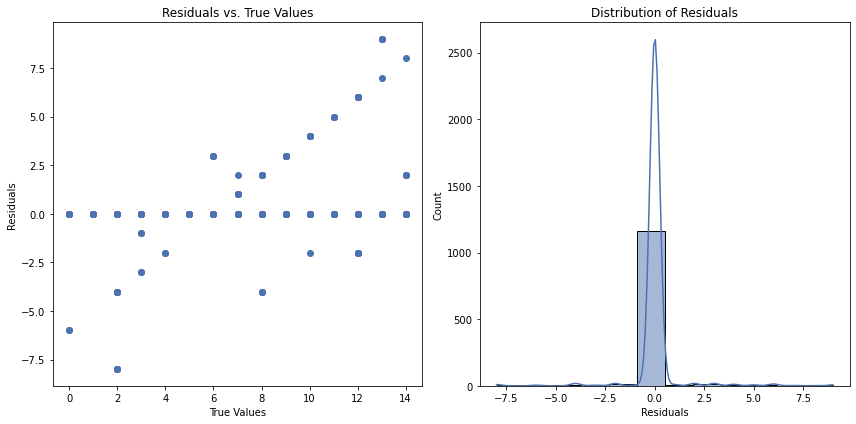

Mean Absolute Percentage Error (MAPE): 43937557340199.99%
Root Mean Squared Error (RMSE): 1.04


In [32]:
sns.set_palette("deep")
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Calculating MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Score for Logistic Regression:  100.0%
Confusion Matrix:
 [[ 29   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  29   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  64   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  53   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  34   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  85   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 141   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  64   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 124   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  30   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 377   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  28   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

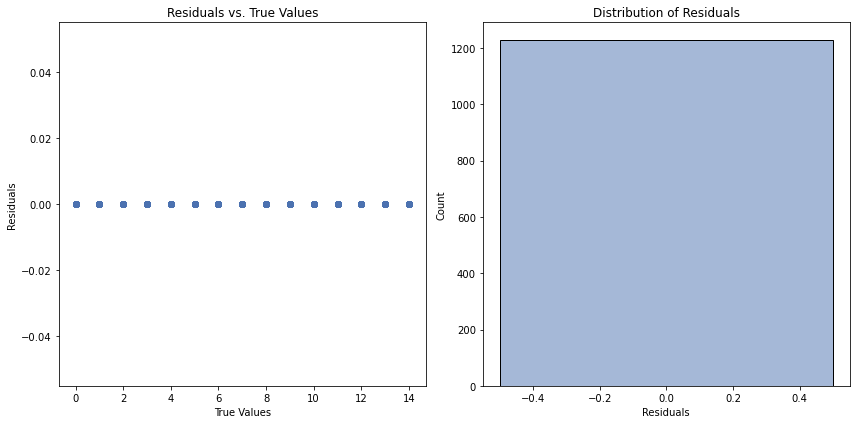

Mean Absolute Percentage Error (MAPE): 0.0%
Root Mean Squared Error (RMSE): 0.0


In [33]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_clf_pred = clf.predict(X_test)

print(f"Score for Logistic Regression:  {clf.score(X_test, y_test)*100}%")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_clf_pred)}")

sns.set_palette("deep")
# Calculating residuals
residuals = y_test - y_clf_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Calculating MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_clf_pred)
rmse = sqrt(mean_squared_error(y_test, y_clf_pred))

print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [35]:
joblib.dump(clf, 'LogRegModel.pkl')

['LogRegModel.pkl']